In [0]:
import zipfile
import requests
import io
import numpy as np
from PIL import Image

In [2]:
url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"

request = requests.get(url)
files = zipfile.ZipFile(io.BytesIO(request.content))

images = []
for file in files.namelist():
  images.append(file)

images = [x for x in images if ".jpg" in x]

len(images)

27000

In [0]:
%matplotlib inline

from skimage.io import imread_collection
from skimage.io import imread

from skimage.color import rgb2gray

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import re

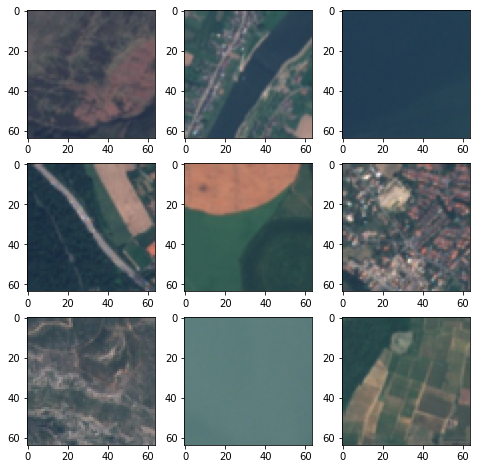

In [4]:
idx = np.random.randint(0, len(images), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      pic = images[idx[slot]]
      img = np.asarray(Image.open(files.open(pic))).astype('uint8')
      axs[i, j].imshow(img)
        
plt.show()

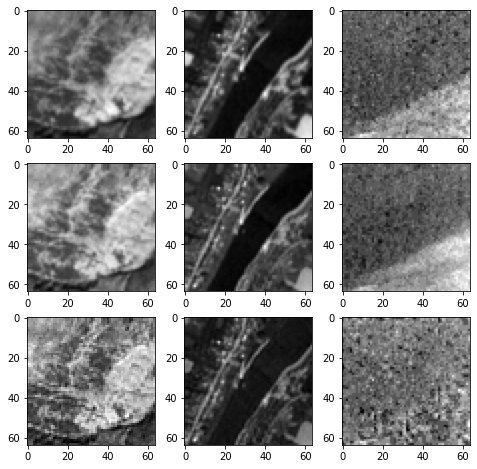

In [5]:
fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    slot = i
    path = images[idx[slot]]
    for j in np.arange(0, 3):
      img = np.asarray(Image.open(files.open(path))).astype('uint8')
      axs[j, i].imshow(img[:,:, j], cmap = 'gray')
        
plt.show()

In [0]:
def vectorize(img):
    mat = np.asarray(Image.open(files.open(img))).astype('uint8')
    bnw = rgb2gray(mat)
    out = bnw.squeeze().flatten()
    return out

In [0]:
series = pd.Series(images, name = "paths")
labels = series.str.split("/").str.get(1)

labels = pd.factorize(labels)

y = np.array(labels[0])

In [0]:
mat = np.asarray(Image.open(files.open(path))).astype('uint8')
bnw = rgb2gray(mat)
out = bnw.squeeze().flatten()

In [0]:
mat = np.zeros([y.shape[0], out.shape[0]])

for i, tmp in series.to_frame().iterrows():
    mat[i] = vectorize(tmp.paths)

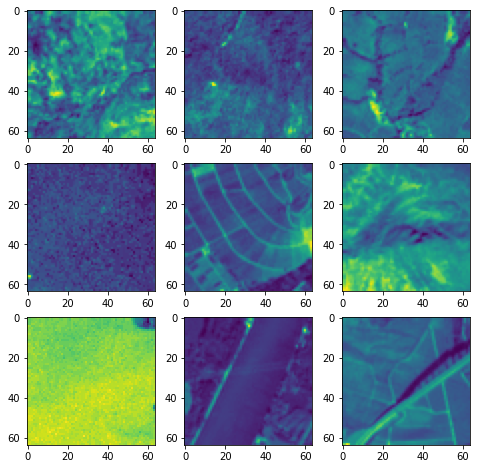

In [10]:
idx = np.random.randint(0, len(images), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      num = i*3+j
      dat = mat[idx[num]].reshape([64, 64])
      axs[i, j].imshow(dat)
        
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mat, y, test_size = 0.5, random_state = 42)

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
num_classes = len(labels[1])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D

EPOCH = 20
BATCH = int(y_train.shape[0] / EPOCH) 

In [16]:
model_one = Sequential()
model_one.add(Dense(num_classes, activation = 'relu', input_shape = (4096,)))

model_one.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40970     
Total params: 40,970
Trainable params: 40,970
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_one.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

history_one = model_one.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 2s 160us/step - loss: 7.3375 - accuracy: 0.1128 - val_loss: 7.3421 - val_accuracy: 0.1002
Epoch 2/20
13500/13500 [==============================] - 0s 32us/step - loss: 7.3732 - accuracy: 0.1098 - val_loss: 7.3453 - val_accuracy: 0.1122
Epoch 3/20
13500/13500 [==============================] - 0s 33us/step - loss: 7.3742 - accuracy: 0.1136 - val_loss: 7.3485 - val_accuracy: 0.1136
Epoch 4/20
13500/13500 [==============================] - 0s 32us/step - loss: 7.3752 - accuracy: 0.1128 - val_loss: 7.3431 - val_accuracy: 0.1125
Epoch 5/20
13500/13500 [==============================] - 0s 33us/step - loss: 7.3747 - accuracy: 0.1106 - val_loss: 7.3440 - val_accuracy: 0.1011
Epoch 6/20
13500/13500 [==============================] - 0s 32us/step - loss: 7.3733 - accuracy: 0.1206 - val_loss: 7.3517 - val_accuracy: 0.1092
Epoch 7/20
13500/13500 [==============================] - 0s 33us/s

In [18]:
score_one = model_one.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_one[0])
print("Test accuracy: ", score_one[1])

Test loss:  7.336169708817094
Test accuracy:  0.12474074214696884


In [19]:
model_two = Sequential()
model_two.add(Dense(500, activation = 'relu', input_shape = (4096,)))
model_two.add(Dense(num_classes, activation = 'relu'))

model_two.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               2048500   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 2,053,510
Trainable params: 2,053,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_two.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

history_two = model_two.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 43us/step - loss: 5.0151 - accuracy: 0.0945 - val_loss: 4.8812 - val_accuracy: 0.1105
Epoch 2/20
13500/13500 [==============================] - 1s 38us/step - loss: 4.9854 - accuracy: 0.1076 - val_loss: 4.8769 - val_accuracy: 0.1124
Epoch 3/20
13500/13500 [==============================] - 1s 38us/step - loss: 4.9850 - accuracy: 0.1047 - val_loss: 4.8733 - val_accuracy: 0.1136
Epoch 4/20
13500/13500 [==============================] - 1s 37us/step - loss: 4.9805 - accuracy: 0.1150 - val_loss: 4.8718 - val_accuracy: 0.1139
Epoch 5/20
13500/13500 [==============================] - 1s 38us/step - loss: 4.9769 - accuracy: 0.1239 - val_loss: 4.8621 - val_accuracy: 0.1225
Epoch 6/20
13500/13500 [==============================] - 1s 37us/step - loss: 4.9751 - accuracy: 0.1241 - val_loss: 4.8568 - val_accuracy: 0.1141
Epoch 7/20
13500/13500 [==============================] - 1s 37us/st

In [21]:
score_two = model_two.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_two[0])
print("Test accuracy: ", score_two[1])

Test loss:  4.8096722981488265
Test accuracy:  0.14051851630210876


In [22]:
model_tre = Sequential()
model_tre.add(Dense(500, activation = 'relu', input_shape = (4096,)))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(300, activation = 'relu'))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(100, activation = 'relu'))
model_tre.add(Dropout(0.3))
model_tre.add(Dense(num_classes, activation = 'relu'))

model_tre.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               2048500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [23]:
model_tre.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_tre = model_tre.fit(X_train, y_train,
                            epochs = EPOCH,
                            batch_size = BATCH,
                            validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 48us/step - loss: 3.6878 - accuracy: 0.1073 - val_loss: 2.3071 - val_accuracy: 0.1136
Epoch 2/20
13500/13500 [==============================] - 1s 37us/step - loss: 2.4653 - accuracy: 0.1014 - val_loss: 2.3061 - val_accuracy: 0.1092
Epoch 3/20
13500/13500 [==============================] - 1s 37us/step - loss: 2.3813 - accuracy: 0.1042 - val_loss: 2.2993 - val_accuracy: 0.1092
Epoch 4/20
13500/13500 [==============================] - 1s 37us/step - loss: 2.3483 - accuracy: 0.1042 - val_loss: 2.2973 - val_accuracy: 0.1092
Epoch 5/20
13500/13500 [==============================] - 0s 37us/step - loss: 2.3309 - accuracy: 0.1100 - val_loss: 2.2959 - val_accuracy: 0.1092
Epoch 6/20
13500/13500 [==============================] - 0s 37us/step - loss: 2.3234 - accuracy: 0.1067 - val_loss: 2.2943 - val_accuracy: 0.1093
Epoch 7/20
13500/13500 [==============================] - 1s 37us/st

In [24]:
score_tre = model_tre.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score_tre[0])
print("Test accuracy: ", score_tre[1])

Test loss:  2.2433813640453195
Test accuracy:  0.13014814257621765


In [0]:
epochs = range(1, EPOCH + 1)

one_val_loss = history_one.history['val_loss']
two_val_loss = history_two.history['val_loss']
tre_val_loss = history_tre.history['val_loss']

one_train_loss = history_one.history['loss']
two_train_loss = history_two.history['loss']
tre_train_loss = history_tre.history['loss']

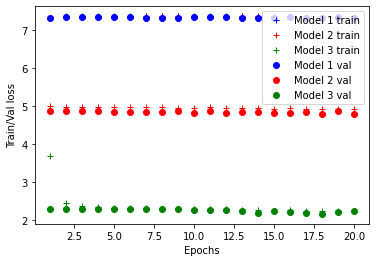

In [26]:
plt.plot(epochs, one_train_loss, 'b+', label = 'Model 1 train')
plt.plot(epochs, two_train_loss, 'r+', label = 'Model 2 train')
plt.plot(epochs, tre_train_loss, 'g+', label = 'Model 3 train')
plt.plot(epochs, one_val_loss, 'bo', label = 'Model 1 val')
plt.plot(epochs, two_val_loss, 'ro', label = 'Model 2 val')
plt.plot(epochs, tre_val_loss, 'go', label = 'Model 3 val')

plt.xlabel('Epochs')
plt.ylabel('Train/Val loss')
plt.legend()

plt.show()

In [0]:
def colorize(img):
    out = np.asarray(Image.open(files.open(img))).astype('uint8')
    return out

In [0]:
test = np.asarray(Image.open(files.open(path))).astype('uint8')

In [0]:
mat = np.zeros([y.shape[0], test.shape[0], test.shape[1], test.shape[2]])

for i, tmp in series.to_frame().iterrows():
    mat[i] = colorize(tmp.paths)
    
mat = mat.astype('uint8')

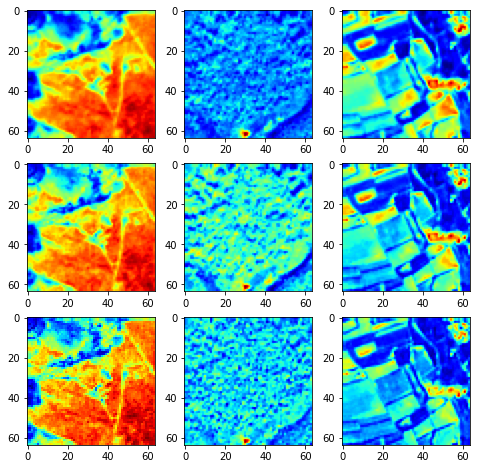

In [30]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    slot = i
    for j in np.arange(0, 3):
        img = mat[idx[slot]]
        axs[j, i].imshow(img[:,:, j], cmap = 'jet')
        
plt.show()

In [0]:
X = mat / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

num_classes = len(labels[1])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = mat.shape[1:]))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
from keras.optimizers import SGD

In [0]:
sgd = SGD(lr = 0.01, momentum = 0.9, nesterov = True)

model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics = ['accuracy'])

In [35]:
model.fit(X_train, y_train,
          epochs = EPOCH,
          batch_size = BATCH,
          validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 9s 640us/step - loss: 2.1930 - accuracy: 0.1637 - val_loss: 1.9681 - val_accuracy: 0.2757
Epoch 2/20
13500/13500 [==============================] - 3s 252us/step - loss: 1.9851 - accuracy: 0.2427 - val_loss: 1.7940 - val_accuracy: 0.3416
Epoch 3/20
13500/13500 [==============================] - 3s 252us/step - loss: 1.8481 - accuracy: 0.3011 - val_loss: 1.7215 - val_accuracy: 0.4064
Epoch 4/20
13500/13500 [==============================] - 3s 251us/step - loss: 1.7505 - accuracy: 0.3451 - val_loss: 1.7847 - val_accuracy: 0.3409
Epoch 5/20
13500/13500 [==============================] - 3s 252us/step - loss: 1.7204 - accuracy: 0.3698 - val_loss: 1.5614 - val_accuracy: 0.4104
Epoch 6/20
13500/13500 [==============================] - 3s 251us/step - loss: 1.6228 - accuracy: 0.4125 - val_loss: 1.5618 - val_accuracy: 0.4736
Epoch 7/20
13500/13500 [==============================] - 3s 2

In [36]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.7822419067665383
Test accuracy:  0.7222962975502014


In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [0]:
model = Sequential()

model.add(ZeroPadding2D((1,1), input_shape = mat.shape[1:]))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics = ['accuracy'])

In [42]:
model.fit(X_train, y_train,
          epochs = EPOCH,
          batch_size = 32,
          validation_data = (X_test, y_test))

Train on 13500 samples, validate on 13500 samples
Epoch 1/20
13500/13500 [==============================] - 23s 2ms/step - loss: 2.0040 - accuracy: 0.2094 - val_loss: 1.6711 - val_accuracy: 0.3284
Epoch 2/20
13500/13500 [==============================] - 22s 2ms/step - loss: 1.5931 - accuracy: 0.3549 - val_loss: 1.3518 - val_accuracy: 0.4979
Epoch 3/20
13500/13500 [==============================] - 22s 2ms/step - loss: 1.1502 - accuracy: 0.5708 - val_loss: 0.9547 - val_accuracy: 0.6430
Epoch 4/20
13500/13500 [==============================] - 22s 2ms/step - loss: 0.9349 - accuracy: 0.6626 - val_loss: 0.8176 - val_accuracy: 0.6996
Epoch 5/20
13500/13500 [==============================] - 23s 2ms/step - loss: 0.8058 - accuracy: 0.7090 - val_loss: 0.9696 - val_accuracy: 0.6540
Epoch 6/20
13500/13500 [==============================] - 22s 2ms/step - loss: 0.7123 - accuracy: 0.7453 - val_loss: 0.7469 - val_accuracy: 0.7330
Epoch 7/20
13500/13500 [==============================] - 22s 2ms/st

In [48]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.966046256241975
Test accuracy:  0.7795555591583252


In [49]:
y_real = np.argmax(y_test, axis = 1)
y_pred = model.predict_classes(X_test)

score = y_real == y_pred

scoreboard = pd.DataFrame({"real": y_real, "score": score}).groupby(["real"], as_index = False).agg({"score": ['count', 'sum']})
scoreboard.score.assign(rate = scoreboard.score['sum'] / scoreboard.score['count']).assign(label = labels[1])

,count,sum,rate,label
0,1224,1032.0,0.843137,River
1,1533,1272.0,0.829746,AnnualCrop
2,1517,640.0,0.421885,HerbaceousVegetation
3,1255,1146.0,0.913147,Industrial
4,1474,1366.0,0.926730,Residential
5,1301,713.0,0.548040,Highway
6,965,755.0,0.782383,Pasture
7,1532,1438.0,0.938642,Forest
8,1475,1445.0,0.979661,SeaLake
9,1224,717.0,0.585784,PermanentCrop


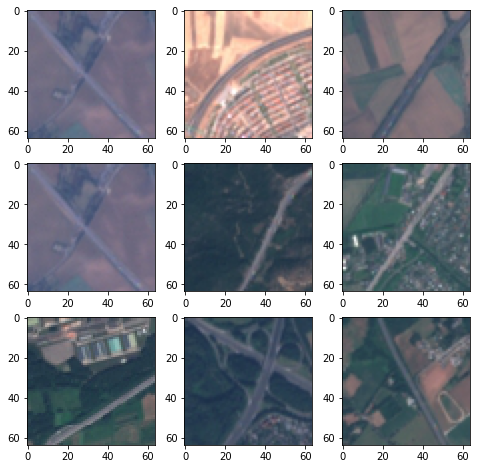

In [50]:
highways = X_test[score & (y_real == 5)]

idx = np.random.randint(0, len(highways), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      img = highways[idx[slot]]
      axs[i, j].imshow(img)
        
plt.show()

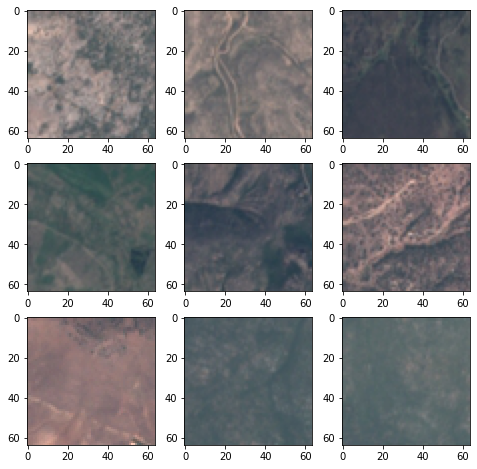

In [51]:
vegation = X_test[score & (y_real == 2)]

idx = np.random.randint(0, len(vegation), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      img = vegation[idx[slot]]
      axs[i, j].imshow(img)
        
plt.show()

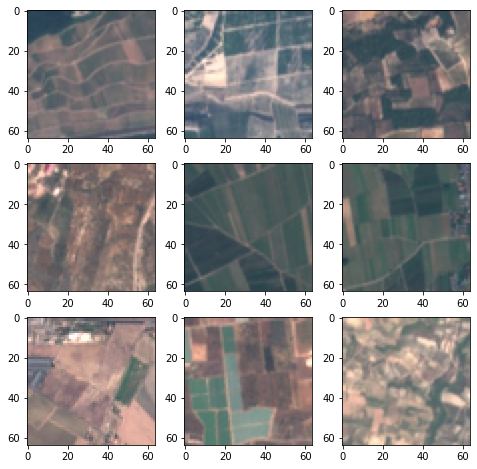

In [52]:
crops = X_test[score & (y_real == 9)]

idx = np.random.randint(0, len(crops), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      img = crops[idx[slot]]
      axs[i, j].imshow(img)
        
plt.show()

In [0]:
pip install tifffile

In [0]:
import tifffile as tiff

In [55]:
url = 'http://madm.dfki.de/files/sentinel/EuroSATallBands.zip'

request = requests.get(url)
files = zipfile.ZipFile(io.BytesIO(request.content))

images = []
for file in files.namelist():
  images.append(file)

images = [x for x in images if ".tif" in x]

len(images)

27000

In [0]:
def scaleImgPerc(imgIn):
    w, h, d = imgIn.shape
    imgIn = np.reshape(imgIn, [w * h, d]).astype(np.float64)
    mins = np.percentile(imgIn, 1, axis=0)
    maxs = np.percentile(imgIn, 99, axis=0) - mins
    imgIn = (imgIn - mins[None, :]) / maxs[None, :]
    imgIn = np.reshape(imgIn, [w, h, d])
    imgIn = imgIn.clip(0, 1)
    return imgIn

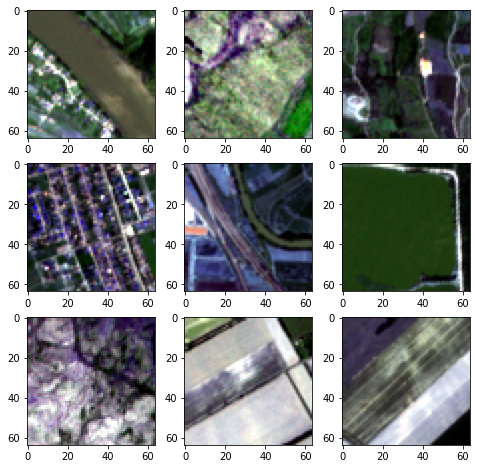

In [68]:
idx = np.random.randint(0, len(images), 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
        slot = i*3+j
        path = images[idx[slot]]
        img = tiff.imread(files.extract(path))
        img = img[:, :, 1:4]
        img = scaleImgPerc(img)
        axs[i, j].imshow(img)
        
plt.show()

In [0]:
series = pd.Series(images, name = "paths")
labels = series.str.split("/").str.get(6)

labels = pd.factorize(labels)

y = np.array(labels[0])

bands = (1, 2, 3, 7)

In [0]:
def multibandize(img, bands):
    new = tiff.imread(files.extract(path))
    out = new[:, :, bands]
    return out

In [0]:
test = multibandize(path, bands)

In [0]:
mat = np.zeros([y.shape[0], test.shape[0], test.shape[1], test.shape[2]])

for i, tmp in series.to_frame().iterrows():
  mat[i] = multibandize(tmp.paths, bands)

mat = mat.astype('uint8')

In [0]:
X = mat

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

num_classes = len(labels[1])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
model = Sequential()

model.add(ZeroPadding2D((1,1), input_shape = mat.shape[1:]))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics = ['accuracy'])

In [0]:
model.fit(X_train, y_train,
          epochs = EPOCH,
          batch_size = 32,
          validation_data = (X_test, y_test))

In [0]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])